In [14]:
from covid.models import SEICHAR
import covid
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from covid.utils import pm, pc, fmt

In [15]:
# Parameters
region_name = 'Brazil/São Paulo'
seed = 2000
i18n = 'pt-BR'

In [16]:
# Derived variables
region = covid.Region(region_name)
covid.set_i18n(i18n)

# Relatório de propagação do COVID-19: {{ region }}

Covid-19 é uma ameaça global, XXX.

Este relatório faz uma previsão da velocidade de alastramento da epidemia de COVID-19 e do impacto desta no sistema de saúde. Fazemos algumas recomendações de ações para conter ou diminuir a velocidade de alastramento do vírus, além de recomendações sobre o tempo ideal para realizar as intervenções.

A simulação possui algumas limitações e incertezas, principalmente porque ainda não conhecemos com muita precisão alguns parâmetros epidemiológicos e clínicos da doença. Alguns destes fatores possuem enorme impacto sobre o resultado final. Dependendo do caso, pequenas variações destes parâmetros podem afetar bastante o resultado das simulações.  

## Características básicas da região

**Nome:** {{ region }}<br>
**População:** {{ fmt(region.population_size) }}<br>
**Leitos de enfermaria:** {{ fmt(region.population_size) }} (ocupação)<br>
**Leitos de UTI:** {{ fmt(region.population_size) }}<br>
**Ocupação enfermaria:** {{ fmt(region.population_size) }}<br>
**Ocupação UTI:** {{ fmt(region.population_size) }}<br>


## Simulação referência

In [20]:
model = RSEICHA(region=region, seed=seed)
model.run()
print(model)


SIMULATION PARAMETERS (RSEICHA)

Parameters
- R0                : 2.74
- P(is symptomatic) : 14.00%


SIMULATION RESULTS (RSEICHA)

Demography
- Total population   : 212.55mi
- Recovered          : 115.38mi (54.28%)
- Fatalities (total) : 1.40mi (0.66%)
- Infectious (max)     : 16.35mi (7.69%)
- Asymptomatic (max) : 100.44mi (47.25%)
- Exposed (max)      : 116.80mi (54.95%)
        

Epidemiology
- R0   : 2.74
- IFR  : 1.21%
- CFR  : 8.61%
- HFR  : 23.45%
- HCFR : 221.19%


Healthcare parameters
- Hosp. days         : 19.81mi
- ICU days           : 11.14mi
- Peak hosp. demand  : 0.78mi (3.71‰)
    x surge capacity : 5.23
    x total          : 1.05
- Peak ICU demand    : 0.27mi (1.29‰)
    x surge capacity : 4.02
    x total          : 0.80
- Hosp. collapse day : 30.00 days (2020-04-24)
- ICU collapse day   : 37.40 days (2020-05-01)


Invariants
- Sum of compartments: 212.55mi (2.16e-14%)



In [21]:
region.population_size

212559000

In [22]:
model.health_resources()

,Name,Items/day,Total
0,Mask,25,773843275
1,Mask N95,1,30953731
2,Avental impermeável,25,773843275
3,Glove,50,1547686550
4,Faceshield,1,30953731


In [23]:
import pnad

ModuleNotFoundError: No module named 'pnad'

In [205]:
df = pnad.load(2012, fields=['age', 'V0102', 'V0103'])

NameError: name 'pnad' is not defined

In [ ]:
df

In [ ]:
from pnad.enums import State, Gender

In [ ]:
State.to_category(State.DF)

In [73]:
print(model.hospital_total_capacity)
print(model.hospital_capacity)

model.HOSPITALIZED

467629.80000000005
149641.536


6

## Necessidade de leitos

Necessidade de leitos no dia com maior quantidade 


In [199]:
pm = True # Por mil habitantes

nec [3.705846791718463, 1.293442730669835]
disp [0.7086949399325965, 0.32213406360572555]
ocup [1.5059767473567678, 0.684534885162167]
total [2.214671687289364, 1.0066689487678926]


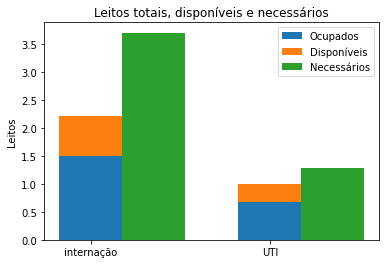

In [200]:
labels_a = ['internação', 'UTI']
labels_b = ['calculado', 'calculados']


available = [model.hospital_capacity, model.icu_capacity]
capacity = [model.hospital_total_capacity, model.icu_total_capacity]
required = [model.peak_hospitalization_demand, model.peak_icu_demand]
unavailable = [total-av for total, av in zip(capacity, available)]

if pm:
    pop = model.population
    available = [item/pop * 1000 for item in available]
    capacity = [item/pop * 1000 for item in capacity]
    unavailable = [item/pop * 1000 for item in unavailable]
    required = [item/pop * 1000 for item in required]

print("nec", required)
print("disp", available)
print("ocup", unavailable)
print("total", capacity)

x = np.arange(len(labels))
width = 0.35
fig, ax = plt.subplots()

ax.bar(labels, unavailable, width, label='Ocupados')
ax.bar(labels, available, width, bottom=unavailable, label='Disponíveis')
ax.bar(width+x, required, width, label='Necessários')

ax.set_ylabel('Leitos')
ax.set_title('Leitos totais, disponíveis e necessários')
ax.legend()

plt.show()

In [207]:
model.ASYMPTOMATIC

7